## Building The Model
-----

### Setup:
---

In [118]:
# Import dependencies
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

In [119]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Import the Combined Data from /Wrangling_Data_Exports

# For PC
# wrangled_df = pd.read_csv("Wrangling_Data_Exports/Wrangled_Data.csv", index_col=0)

# For Colab
wrangled_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Wrangling_Data_Exports/Wrangled_Data.csv", index_col=0)

# Display Dataframe
wrangled_df.head(5)

,Year,Month,Day,Time (EST),Season Week,Venue,City,State,Weather Condition,Temperature (F),...,Home Team Pre-Game Season W/L Ratio,Home Team Pre-Game Season Avg Points For,Home Team Pre-Game Season Avg Points Against,Outcome,Away Team,Away Team Pre-Game Season W Streak,Away Team Pre-Game Season L Streak,Away Team Pre-Game Season W/L Ratio,Away Team Pre-Game Season Avg Points For,Away Team Pre-Game Season Avg Points Against
0,2022.0,September,25,14:25,3.0,State Farm Stadium,Glendale,Arizona,None (retractable roof closed),72.0,...,0.50,25.00,33.50,2.0,Los Angeles Rams,1.0,0.0,0.50,20.50,29.00
1,2022.0,November,6,16:05,9.0,State Farm Stadium,Glendale,Arizona,Sunny,76.0,...,0.38,22.75,26.25,2.0,Seattle Seahawks,3.0,0.0,0.62,26.25,24.88
2,2022.0,November,27,16:05,12.0,State Farm Stadium,Glendale,Arizona,None (retractable roof closed),72.0,...,0.36,21.82,26.91,2.0,Los Angeles Chargers,0.0,2.0,0.50,22.70,25.80
3,2022.0,December,12,20:15,14.0,State Farm Stadium,Glendale,Arizona,None (retractable roof closed),72.0,...,0.33,22.00,26.75,2.0,New England Patriots,0.0,2.0,0.50,20.75,18.83
4,2022.0,December,25,20:20,16.0,State Farm Stadium,Glendale,Arizona,Fair,69.0,...,0.29,20.86,26.57,2.0,Tampa Bay Buccaneers,0.0,2.0,0.43,17.64,20.57


### Prepare the Features and Target Arrays:
---

In [121]:
# Create Target Array
targets= wrangled_df["Outcome"].astype(int).values

# Display Array
targets

array([2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1])

In [122]:
# Create Features Dataframe
features_df = wrangled_df.drop(columns=["Outcome"])
features_df = features_df.drop(columns=["Year"])
features_df = features_df.drop(columns=["Day"])

# Display Weather Condition Options (Now Parsed Down)
features_df["Weather Condition"].value_counts()

Mostly cloudy                     52
Sunny                             43
None (retractable roof closed)    33
None (indoor stadium)             30
Fair                              20
Partly cloudy                     16
Raining                            8
Showers                            3
Cold                               1
Name: Weather Condition, dtype: int64

In [123]:
# Git Dummies
dummies_features_df = pd.get_dummies(features_df)

# Display Dataframe
dummies_features_df.columns

Index(['Season Week', 'Temperature (F)', 'Home Team Pre-Game Season W Streak',
       'Home Team Pre-Game Season L Streak',
       'Home Team Pre-Game Season W/L Ratio',
       'Home Team Pre-Game Season Avg Points For',
       'Home Team Pre-Game Season Avg Points Against',
       'Away Team Pre-Game Season W Streak',
       'Away Team Pre-Game Season L Streak',
       'Away Team Pre-Game Season W/L Ratio',
       ...
       'Away Team_New Orleans Saints', 'Away Team_New York Giants',
       'Away Team_New York Jets', 'Away Team_Philadelphia Eagles',
       'Away Team_Pittsburgh Steelers', 'Away Team_San Francisco 49ers',
       'Away Team_Seattle Seahawks', 'Away Team_Tampa Bay Buccaneers',
       'Away Team_Tennessee Titans', 'Away Team_Washington Commanders'],
      dtype='object', length=195)

In [124]:
# Grab Dummies Column Names
dummies_columns_array =[]

for column in dummies_features_df.columns:
  dummies_columns_array.append(column)

dummies_columns_array


['Season Week',
 'Temperature (F)',
 'Home Team Pre-Game Season W Streak',
 'Home Team Pre-Game Season L Streak',
 'Home Team Pre-Game Season W/L Ratio',
 'Home Team Pre-Game Season Avg Points For',
 'Home Team Pre-Game Season Avg Points Against',
 'Away Team Pre-Game Season W Streak',
 'Away Team Pre-Game Season L Streak',
 'Away Team Pre-Game Season W/L Ratio',
 'Away Team Pre-Game Season Avg Points For',
 'Away Team Pre-Game Season Avg Points Against',
 'Month_December',
 'Month_January',
 'Month_November',
 'Month_October',
 'Month_September',
 'Time (EST)_12:00',
 'Time (EST)_12:30',
 'Time (EST)_13:00',
 'Time (EST)_13:25',
 'Time (EST)_13:30',
 'Time (EST)_14:00',
 'Time (EST)_14:25',
 'Time (EST)_15:05',
 'Time (EST)_15:25',
 'Time (EST)_15:30',
 'Time (EST)_16:05',
 'Time (EST)_16:25',
 'Time (EST)_16:30',
 'Time (EST)_18:15',
 'Time (EST)_19:15',
 'Time (EST)_19:20',
 'Time (EST)_19:30',
 'Time (EST)_20:15',
 'Time (EST)_20:20',
 'Venue_AT&T Stadium',
 'Venue_Acrisure Stadium

In [125]:
# Export List of Columns
with open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/Features_Names.txt","w") as outfile:
  outfile.write(f'{dummies_columns_array}')

In [126]:
# Create an Array from the Features Dataframe with Dummies
features_array = dummies_features_df.values

features_array

array([[ 3., 72.,  1., ...,  0.,  0.,  0.],
       [ 9., 76.,  0., ...,  0.,  0.,  0.],
       [12., 72.,  0., ...,  0.,  0.,  0.],
       ...,
       [12., 49.,  2., ...,  0.,  0.,  0.],
       [17., 62.,  0., ...,  0.,  0.,  0.],
       [18., 42.,  0., ...,  0.,  0.,  0.]])

In [127]:
# Scale the Data

# Create a Scaler
scaler = StandardScaler()

# Fit the StandardScaler
features_scaler = scaler.fit(features_array)

# Scale the Features
scaled_features = features_scaler.transform(features_array)

scaled_features

array([[-1.19258603,  0.57341892,  0.08218471, ..., -0.18128389,
        -0.19425717, -0.16744367],
       [-0.05019593,  0.82995611, -0.61322437, ..., -0.18128389,
        -0.19425717, -0.16744367],
       [ 0.52099912,  0.57341892, -0.61322437, ..., -0.18128389,
        -0.19425717, -0.16744367],
       ...,
       [ 0.52099912, -0.90166991,  0.77759378, ..., -0.18128389,
        -0.19425717, -0.16744367],
       [ 1.47299087, -0.06792405, -0.61322437, ..., -0.18128389,
        -0.19425717, -0.16744367],
       [ 1.66338922, -1.35060999, -0.61322437, ..., -0.18128389,
        -0.19425717, -0.16744367]])

### Prepare the PCA Model:
---

In [128]:
# Create Primary Component Analysis Model With 95% Explainability
pca_model=PCA(n_components=0.95)

In [129]:
# FIt PCA Model
pca_features = pca_model.fit_transform(scaled_features)

pca_features

array([[-0.30568884, -5.1579472 , -2.28267856, ...,  1.53487138,
        -0.8378722 , -0.09166135],
       [-1.26452301, -4.96489162, -1.72385944, ...,  0.21319428,
         1.61663675,  0.98365451],
       [-0.46651811, -5.55261743, -2.5932742 , ...,  0.64769803,
        -0.37712574, -0.38348582],
       ...,
       [-0.71821409,  1.87977727,  0.00630139, ..., -0.09262284,
         0.0699516 , -0.92833691],
       [-0.72906288,  0.97764893, -0.83279509, ..., -0.93484084,
         0.13193198,  0.30010869],
       [-1.55829776,  1.01519948, -0.71305426, ...,  0.89150948,
         1.65021433, -0.55576053]])

In [130]:
# Check Number of PCA Features
pca_features_count = len(pca_features[0])

print(f'PCA Features: {pca_features_count}')

PCA Features: 71


### Prepare the Data for Training Models:
---

In [131]:
# Train/Test Split The Data
X_train, X_test, y_train, y_test = train_test_split(pca_features ,targets,random_state=1)

### Prepare the Logistic Regression Model:
---

In [132]:
# Create the Model
log_reg_model = LogisticRegression(max_iter=500)

log_reg_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

In [133]:
# Check Training and Testing Scores
print(f'Training Score: {log_reg_model.score(X_train, y_train)}')
print(f'Testing Score: {log_reg_model.score(X_test, y_test)}')

Training Score: 0.8181818181818182
Testing Score: 0.4909090909090909


### Prepare the Random Forest Model:
---

In [134]:
# Create The Random Forest Model
rf_model = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train, y_train)

In [135]:
# Check Training and Testing Scores
print(f'Training Score: {rf_model.score(X_train, y_train)}')
print(f'Testing Score: {rf_model.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6


### Prepare the KNN Model:
---

k: 1, Train/Test Score: 1.000/0.564
k: 3, Train/Test Score: 0.770/0.564
k: 5, Train/Test Score: 0.691/0.564
k: 7, Train/Test Score: 0.655/0.455
k: 9, Train/Test Score: 0.661/0.455
k: 11, Train/Test Score: 0.655/0.491
k: 13, Train/Test Score: 0.636/0.509
k: 15, Train/Test Score: 0.642/0.509
k: 17, Train/Test Score: 0.624/0.491
k: 19, Train/Test Score: 0.636/0.545
k: 21, Train/Test Score: 0.600/0.582
k: 23, Train/Test Score: 0.606/0.582
k: 25, Train/Test Score: 0.606/0.618
k: 27, Train/Test Score: 0.600/0.582
k: 29, Train/Test Score: 0.558/0.545
k: 31, Train/Test Score: 0.570/0.509
k: 33, Train/Test Score: 0.600/0.509
k: 35, Train/Test Score: 0.564/0.564
k: 37, Train/Test Score: 0.570/0.545
k: 39, Train/Test Score: 0.558/0.600
k: 41, Train/Test Score: 0.564/0.564
k: 43, Train/Test Score: 0.545/0.545
k: 45, Train/Test Score: 0.545/0.582
k: 47, Train/Test Score: 0.533/0.582
k: 49, Train/Test Score: 0.545/0.564


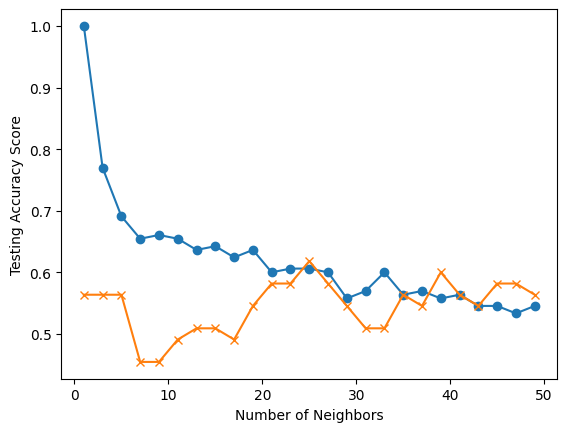

In [136]:
# Check for K-Value with The Heighest Accuracy
training_data_scores = []
testing_data_scores = []

for k in range(1, 50, 2):

    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_score = knn_model.score(X_train, y_train)
    test_score = knn_model.score(X_test, y_test)

    training_data_scores.append(train_score)
    testing_data_scores.append(test_score)

    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(1, 50, 2), training_data_scores, marker='o')
plt.plot(range(1, 50, 2), testing_data_scores, marker="x")
plt.xlabel("Number of Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

In [137]:
# Create KNN Model
knn_model = KNeighborsClassifier(n_neighbors=25)

knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [138]:
# Check Training and Testing Scores
print(f'Training Score: {knn_model.score(X_train, y_train)}')
print(f'Testing Score: {knn_model.score(X_test, y_test)}')

Training Score: 0.6060606060606061
Testing Score: 0.6181818181818182


### Prepare the Nural Network Model:
---

In [139]:
# Count features
features_count = len(X_train[0])
print(f'Total Features: {features_count}')

Total Features: 71


In [140]:
# Define Nural Network Model

nn = tf.keras.models.Sequential()

# Input layer
nn.add(tf.keras.layers.Dense(units=4, activation="relu", input_dim=features_count))

# Second layer
nn.add(tf.keras.layers.Dense(units=2, activation="relu"))

# Third layer
nn.add(tf.keras.layers.Dense(units=2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 288       
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 2)                 6         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 307 (1.20 KB)
Trainable params: 307 (1.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])

In [142]:
# Train the model
fit_nn = nn.fit(X_train, y_train, epochs=500)

Epoch 1/500
6/6 [==============================] - 1s 3ms/step - loss: 0.5752 - accuracy: 0.4970
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.5576
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.5576
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.5576
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.5576
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4347 - accuracy: 0.5576
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.5576
Epoch 8/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.5576
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.5576
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.5576
Epoch 11/500
6/6 [===========

In [143]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2/2 - 0s - loss: -2.6818e+03 - accuracy: 0.5818 - 117ms/epoch - 58ms/step
Loss: -2681.760498046875, Accuracy: 0.581818163394928


### Export the Trained Models We Will Use:
---

In [144]:
# Export the Trained Models
import pickle

with open ("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/scaler_model","wb") as f:
  pickle.dump(features_scaler,f)

with open ("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/pca_model","wb") as f:
  pickle.dump(pca_model,f)

with open ("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/rf_model","wb") as f:
  pickle.dump(rf_model,f)


### Test Importing the Trained Models We Will Use for a Prediction:
---

In [145]:
# Imports Needed if Replicating
from pathlib import Path
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [146]:
# Test Importing Trained Models

test_scaler = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/scaler_model","rb"))

test_pca = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/pca_model","rb"))

test_rf = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/Building_Model_Exports/rf_model","rb"))

In [147]:
# Grab a Game to Use as an Example
test_game = dummies_features_df[(dummies_features_df["Season Week"]==3.0)].head(1)

test_game

,Season Week,Temperature (F),Home Team Pre-Game Season W Streak,Home Team Pre-Game Season L Streak,Home Team Pre-Game Season W/L Ratio,Home Team Pre-Game Season Avg Points For,Home Team Pre-Game Season Avg Points Against,Away Team Pre-Game Season W Streak,Away Team Pre-Game Season L Streak,Away Team Pre-Game Season W/L Ratio,...,Away Team_New Orleans Saints,Away Team_New York Giants,Away Team_New York Jets,Away Team_Philadelphia Eagles,Away Team_Pittsburgh Steelers,Away Team_San Francisco 49ers,Away Team_Seattle Seahawks,Away Team_Tampa Bay Buccaneers,Away Team_Tennessee Titans,Away Team_Washington Commanders
0,3.0,72.0,1.0,0.0,0.5,25.0,33.5,1.0,0.0,0.5,...,0,0,0,0,0,0,0,0,0,0


In [148]:
# Get a Features Array for Test Game
test_features_array = test_game.values

In [149]:
# Scale Using Scaler Model
test_scaled_features = test_scaler.transform(test_features_array)

In [150]:
# Run PCA Using PCA Model
test_pca_features = test_pca.transform(test_scaled_features)

In [151]:
# Get a Prediction Using Random Forest Model
test_rf.predict(test_pca_features)

array([2])